## Analyse der MedReg Daten über Psychiater mit Berufsbewilligung (BAB)
In diesem Notebook sollen die bereinigten und überprüften Daten aus den beiden Notenooks [MedReg_Analyse_01_Bereinigen](/Users/master/Desktop/CAS_DJ/MedReg/MedReg Scraping 2020/MedReg_Analyse_01_Bereinigen.ipynb) und [MedReg_Analyse_02_Datencheck](/Users/master/Desktop/CAS_DJ/MedReg/MedReg Scraping 2020/MedReg_Analyse_02_Datencheck.ipynb) einer ersten Analyse unterzogen werden.

Die Frage stellt sich, welche Tätigkeiten nicht bewilligungspflichtig sind (das will ich das BAG noch nachfragen). Analysen die durch das Gesundheitsobservatorium Obsan vorgenommen wurden, basieren offenbar immer auf den kantonalen Bewilligungen. 

Deshalb soll, für Kontrollzwecke, in diesem Notebook noch die Auswertung der Entwicklung per Jahresende über die letzten Jahre mit den eingeschränkten Daten (nur mit BAB) wiederholt werden. Allerdings denke ich, dass für eine Publikation die erteilten Diplome aussagekräftig sind, um die Tendenz der zugewanderten Fachkräfte gut abzubilden. 


In [ ]:
import pandas as pd
import re
import numpy as np
import datetime
%matplotlib inline

In [ ]:
df = pd.read_csv(r'medreg_2020_psych_b2019_20200128.csv')

In [ ]:
df_erteilt = df[df['BAB Status'] == 'Erteilt']

In [ ]:
len(df_erteilt)

In [ ]:
df_erteilt[df_erteilt['Arzt_Land'] == "Schweiz"].groupby('PP_CH')['PP_CH'].count().plot(figsize=(15,8)) 


Die Grafik oben zeigt die Entwicklung mit Schweizer Abschlüssen. 
Jetzt nehmen wir noch alle Daten ohne schweizerischen Medizinabschluss hinzu, welche nach Inkraktreten der bilateralen Verträge direkt anerkannt wurden und für den grossen Ärztezustrom sorgten:

In [ ]:
chart1 = df_erteilt[df['Arzt_Land'] == "Schweiz"].groupby('PP_CH')['PP_CH'].count().plot(figsize=(15,8))
df_erteilt[df['Arzt_Land'] != "Schweiz"].groupby('PP_CH')['PP_CH'].count().plot(ax=chart1)

Hier zum Verglich die Kurve der aller anerkannten Diplome:

In [ ]:
chart1 = df[df['Arzt_Land'] == "Schweiz"].groupby('PP_CH')['PP_CH'].count().plot(figsize=(15,8))
df[df['Arzt_Land'] != "Schweiz"].groupby('PP_CH')['PP_CH'].count().plot(ax=chart1)

Aus meiner Sicht lässt sich der starke Abfall gegen hinten, also 2018, 2019 damit erklären, dass einerseit einige Kantone einen Zulassungsstopp erlassen haben, andererseits dass zwischen Anerkennung und Ausübungsbewilligung naturgemäss eine gewisse Zeit verstreicht. 

Jetzt bauen wir mit den Daten mit erteilter Bewilligung noch eine neues Dataframe:

In [ ]:
df_bab_all = pd.DataFrame()

In [ ]:
df_bab_all['CH'] = df_erteilt[df_erteilt['Arzt_Land'] == "Schweiz"].groupby('PP_CH')['PP_CH'].count()
df_bab_all['Ausland'] = df_erteilt[df_erteilt['Arzt_Land'] != "Schweiz"].groupby('PP_CH')['PP_CH'].count()
df_bab_all['Total'] = df_total = df_erteilt.groupby('PP_CH')['PP_CH'].count()

In [46]:
df_bab_all.tail(10)

,Jahr,CH,Ausland,Total
45,2010,71,78.0,149
46,2011,63,103.0,166
47,2012,70,164.0,234
48,2013,65,130.0,195
49,2014,47,142.0,189
50,2015,33,129.0,162
51,2016,32,137.0,169
52,2017,37,127.0,164
53,2018,36,100.0,136
54,2019,18,53.0,71


In [47]:
df_bab_all = df_bab_all.reset_index()

In [48]:
df_bab_all = df_bab_all.rename(columns = {'PP_CH' : 'Jahr'})

In [49]:
df_bab_all.tail(12)

,index,Jahr,CH,Ausland,Total
43,43,2008,99,87.0,186
44,44,2009,74,84.0,158
45,45,2010,71,78.0,149
46,46,2011,63,103.0,166
47,47,2012,70,164.0,234
48,48,2013,65,130.0,195
49,49,2014,47,142.0,189
50,50,2015,33,129.0,162
51,51,2016,32,137.0,169
52,52,2017,37,127.0,164


In [50]:
df_bab_all['CH %'] = df_bab_all['CH'] / df_bab_all['Total'] * 100

In [51]:
df_bab_all['Ausl %'] = df_bab_all['Ausland'] / df_bab_all['Total'] * 100

In [52]:
df_bab_all

,index,Jahr,CH,Ausland,Total,CH %,Ausl %
0,0,1957,2,NaN,2,100.000000,NaN
1,1,1964,1,NaN,1,100.000000,NaN
2,2,1967,4,NaN,4,100.000000,NaN
3,3,1968,1,NaN,1,100.000000,NaN
4,4,1969,5,NaN,5,100.000000,NaN
5,5,1970,1,NaN,1,100.000000,NaN
6,6,1971,4,NaN,4,100.000000,NaN
7,7,1972,2,NaN,2,100.000000,NaN
8,8,1973,9,NaN,9,100.000000,NaN
9,9,1974,6,NaN,6,100.000000,NaN


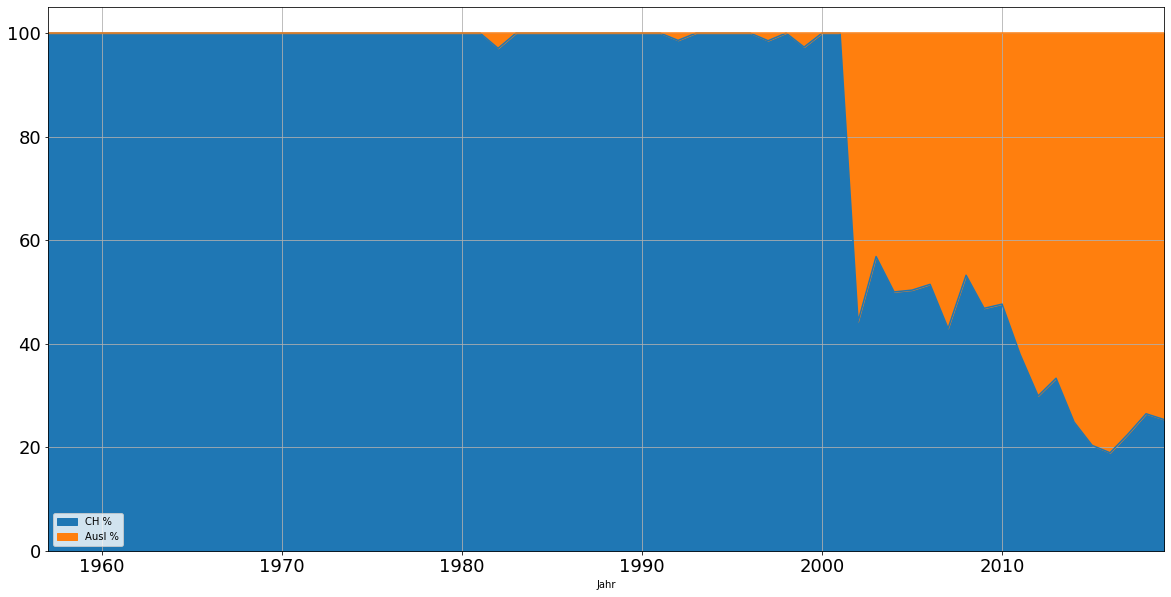

In [53]:
df_bab_plot1 = df_bab_all[['Jahr', 'CH %', 'Ausl %']]
df_bab_plot1.plot(x = 'Jahr', y = ['CH %', 'Ausl %'], kind = 'area', grid = True, fontsize = 18, figsize=(20,10))

Und jetzt noch die Daten 15 Jahre zurück:

In [54]:
df_bab_plot2 = df_bab_plot1.tail(15)

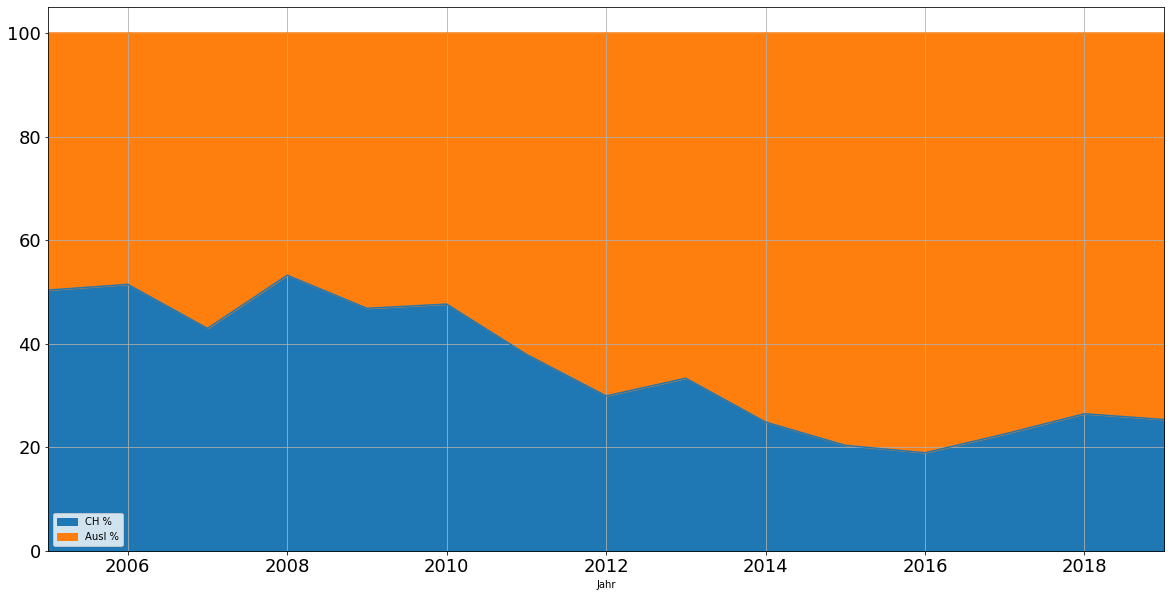

In [55]:
df_bab_plot2 = df_bab_plot1.tail(15)
df_bab_plot2.plot(x = 'Jahr', y = ['CH %', 'Ausl %'], kind = 'area', grid = True, fontsize = 18, figsize=(20,10))

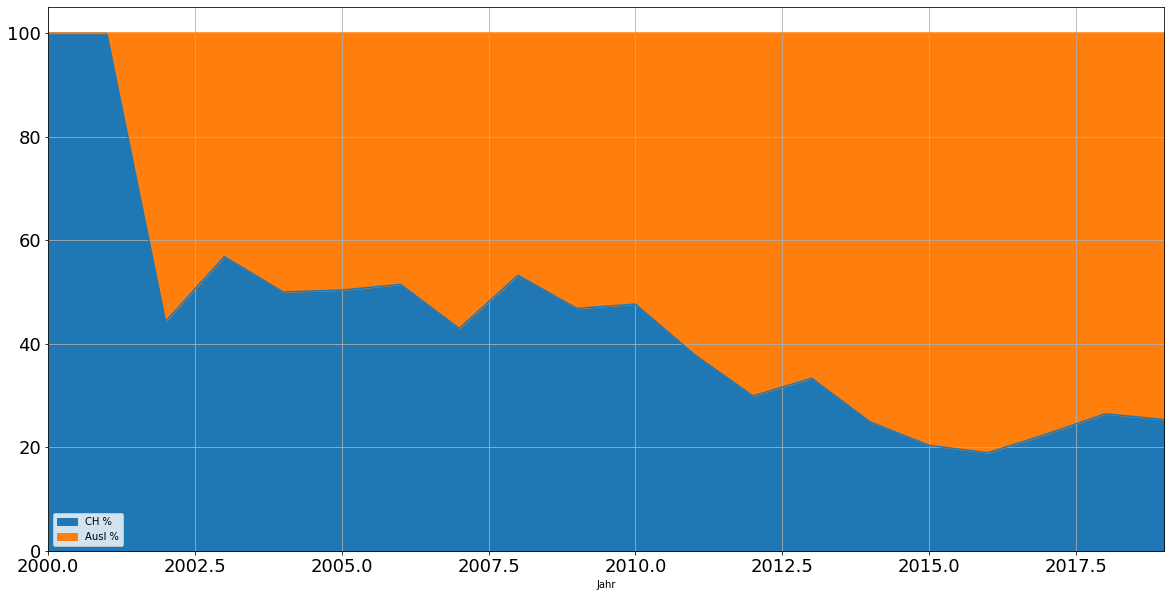

In [57]:
df_bab_plot3 = df_bab_plot1.tail(20)
df_bab_plot3.plot(x = 'Jahr', y = ['CH %', 'Ausl %'], kind = 'area', grid = True, fontsize = 18, figsize=(20,10))

In [ ]:
df_bab_all.to_csv(r'/Users/master/Desktop/CAS_DJ/MedReg/Datananalyse_output/Psych_BAB_Land_Medizinstudium_1957b2019.csv',index = 'Jahr', header=True)